## Customer churn at Telco

## Goal:
* Discover features driving customer churn.
* Build a classification model with those features to predict churn using new data.

## Imports

In [1]:
#Import libraries, built modules and functions.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import preprocess as p
import explore as e
import modeling as m

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.model_selection import train_test_split
from acquire import get_telco_data
from env import get_connection
from prep import telco_pipeline


## Acquire

* Data acquired from Codeup's MySQL server
* Initial shape was (7043, 26)
* Each row represents customer information
* Each column represents a feature of the customers.

---

## 2. Prepare

* Checked for null values & found 5,174 in churn_month
* Dropped purposeless columns 
* Removed white space and added a 0 to total_charges column
* Casted total_charges column data type to float
* Split data (70%, 15%, 15%)

## Data dictionary

|Feature|Definition|
|:-------|:----------|
|gender|customer gender|
|contract_type|The type of contract the customer has agreed to|
|paperless_billing|Whether the customer utilizes paperless billing or not|
|senior_citizen|Whether or not customer is a senior citizen|
|partner| Whether or not the customer has a partner|
|dependents| Whether or not the customer has dependents|
|monthly_charges| How much the customers pays for service monthly|	
|multiple_lines| Whether or not the customer has multiple lines|	
|online_security| Whether or not the customer has online security|	
|online_backup| Whether or not the customer has online backup|
|device_protection| Whether or not the customer has device protection|
|tech_support| Whether or not the customer has tech support|	
|streaming_tv| Whether or not the customer streams tv|
|streaming_movies| Whether or not the customer streams movies or not|	
|internet_service_type| Type of internet service the customer has|
|payment_type| Type of payment the customer uses|

In [2]:
#look at our data
train, val, test = telco_pipeline()
train.head()

found data


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
5609,Male,0,No,No,14,Yes,No,No,No,Yes,No,No,No,No,76.45,1117.55,No,Electronic check,Month-to-month,Fiber optic
2209,Male,0,No,No,5,Yes,No,No,No,Yes,No,Yes,Yes,Yes,70.00,347.40,Yes,Mailed check,One year,DSL
6919,Male,0,Yes,No,35,Yes,Yes,No,No,No,No,No,No,Yes,75.20,2576.20,Yes,Electronic check,Month-to-month,Fiber optic
2284,Male,0,Yes,No,58,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,86.10,4890.50,No,Electronic check,Two year,DSL
845,Female,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,49.60,114.70,Yes,Mailed check,Month-to-month,DSL


In [3]:
#verify all columns match.
train.shape, val.shape, test.shape

((4930, 20), (1056, 20), (1057, 20))

---

## 3. Exploration

## Does one gender churn more than the other?
* Ho: There is no association between "churn" and "gender" feature
* Ha: There is an association between "churn" and "gender" feature


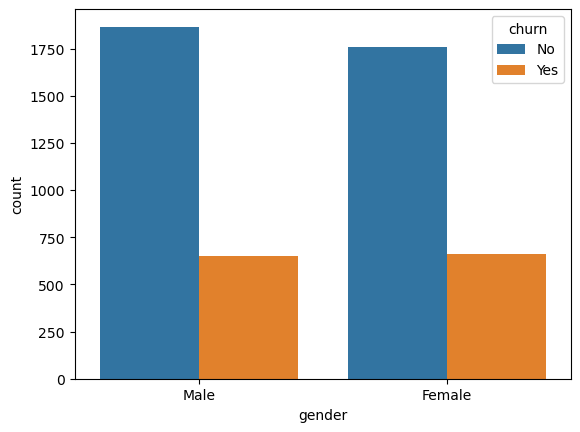

Chi-Square Statistic: 1.425229713773847
P-value: 0.2325445321392852
Degrees of Freedom: 1
Expected Frequencies:
 [[1775.00040568 1846.99959432]
 [ 640.99959432  667.00040568]]

Conclusion: There is no significant association between the variables. we fail to reject the null hypothesis
None


In [4]:
#use count plot and print chi-square test
e.countplt(train, 'churn', 'gender')
print(e.chi(train, 'churn', 'gender'))

---

## Does having phone service or not drive churn?
* Ho: There is no association between "churn" and "phone_service" feature
* Ha: There is an association between "churn" and "phone_service" feature

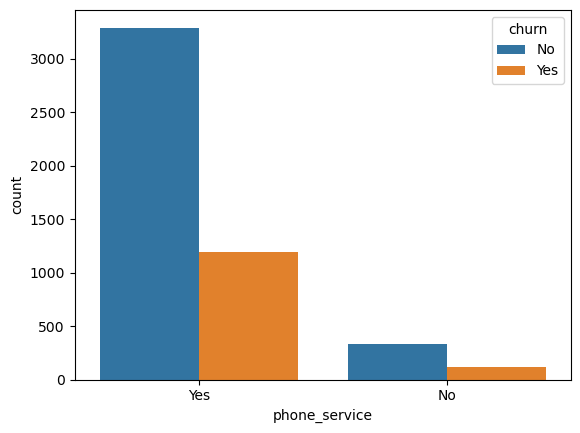

Chi-Square Statistic: 0.16104933590843382
P-value: 0.6881922507463794
Degrees of Freedom: 1
Expected Frequencies:
 [[ 326.93509128 3295.06490872]
 [ 118.06490872 1189.93509128]]

Conclusion: There is no significant association between the variables. we fail to reject the null hypothesis
None


In [5]:
e.countplt(train, 'churn', 'phone_service')
print(e.chi(train, 'churn', 'phone_service'))

---

## Does the amount of lines drive churn?
* Ho: There is no association between "churn" and "multiple_lines" feature
* Ha: There is an association between "churn" and "multiple_lines" feature

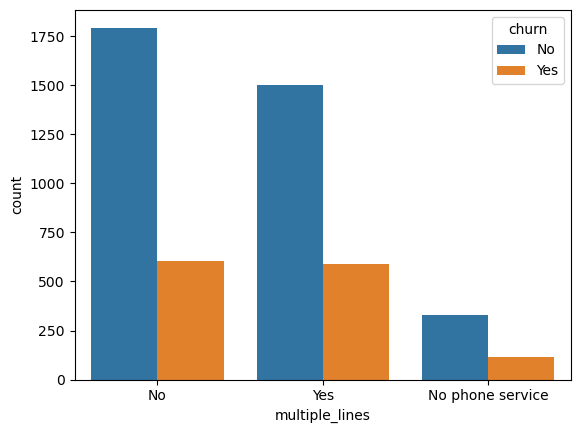

Chi-Square Statistic: 5.564920974218287
P-value: 0.06188605006622484
Degrees of Freedom: 2
Expected Frequencies:
 [[1761.04137931  326.93509128 1534.02352941]
 [ 635.95862069  118.06490872  553.97647059]]

Conclusion: There is no significant association between the variables. we fail to reject the null hypothesis
None


In [6]:
e.countplt(train, 'churn', 'multiple_lines')
print(e.chi(train, 'churn', 'multiple_lines'))

---

## What type of contracts drive churn?

* Ho: There is no association between "churn" and "contract_type" feature
* Ha: There is an association between "churn" and "contract_type" feature

Text(0.5, 1.1, 'Total Customers for each Contract Type')

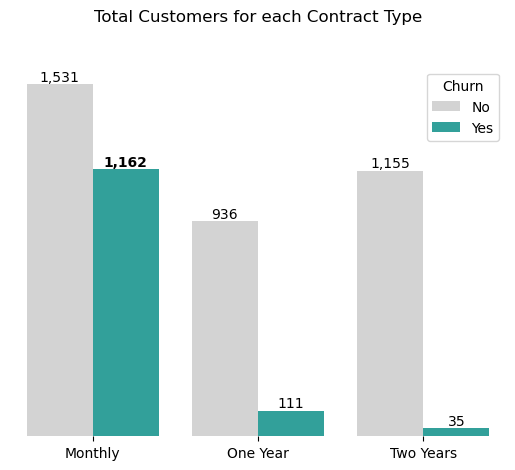

In [87]:
custom_colors = ["lightgrey", "lightseagreen"]  # Replace with your desired colors


ax = sns.countplot(data = train, x = 'contract_type', hue = 'churn', palette = custom_colors)

ax = plt.gca()  # Get the current Axes object

for p in ax.patches:
    value = int(p.get_height())  # Get the height (value) of each bar
    if value != 0:  # Exclude zero values
        label = f"{value:,}"  # Format value with commas
        if value == 1162:  # Customize the label for the highest value
            ax.text(p.get_x() + p.get_width() / 2, p.get_height(), label, ha="center", va="bottom", fontweight="bold")
        else:
            ax.text(p.get_x() + p.get_width() / 2, p.get_height(), label, ha="center", va="bottom")



new_labels = ["Monthly", "One Year", "Two Years"]  # Replace with your desired labels
plt.xticks(range(len(new_labels)), new_labels)  # Assign new labels to x-axis ticks
plt.xlabel("")  # Set custom x-axis label
plt.ylabel('Count')
# Remove borders
sns.despine(ax=ax, left=True, bottom=True)

# Remove y-axis
ax.yaxis.set_visible(False)
# Edit the legend

ax.legend(title="Churn",loc="upper right")

plt.title("Total Customers for each Contract Type", y= 1.10)  # Set the title


## Do customers churn because of high monthly charges?
* Ho: The mean monthly charges of customers churn is not significantly higher than the population monthly charge average
* Ha: The mean monthly charges of customers churn is significantly higher than the population monthly charge average

Text(0.5, 1.1, ' Average Monthly Charges ')

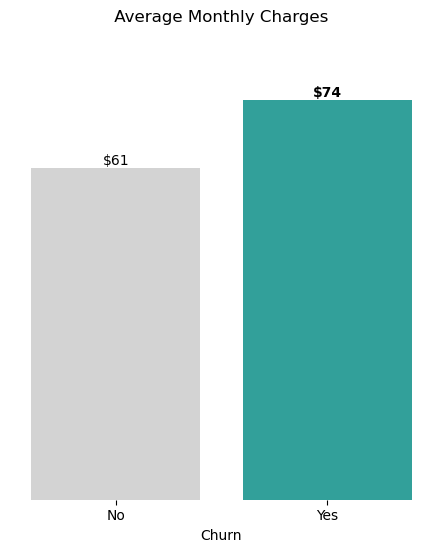

In [86]:
custom_colors = ["lightgrey", "lightseagreen"]  # Replace with your desired colors

#catplot categorical to numerical
ax = sns.catplot(data= train, x= 'churn', y= 'monthly_charges', kind = 'bar', palette = custom_colors, errwidth= 0)

ax = plt.gca()  # Get the current Axes object

for p in ax.patches:
    value = int(p.get_height())  # Get the height (value) of each bar
    if value != 0:  # Exclude zero values
        label = f"${value:,}"  # Format value with commas
        if value == 74:  # Customize the label for the highest value
            ax.text(p.get_x() + p.get_width() / 2, p.get_height(), label, ha="center", va="bottom", fontweight="bold")
        else:
            ax.text(p.get_x() + p.get_width() / 2, p.get_height(), label, ha="center", va="bottom")


plt.xlabel("Churn")  # Set custom x-axis label
plt.ylabel('Monthly Charges')

# Remove y-axis
ax.yaxis.set_visible(False)


# Edit the legend
sns.despine(left=True, bottom=True)  # Remove left and bottom spines and ticks

plt.title(''' Average Monthly Charges ''', y= 1.10)  # Set the title


In [ ]:
#one sample two tailed t-test
sample = train[train.churn == 'Yes'].monthly_charges
overall_mean = (train.monthly_charges).mean()

e.one_samp_t(sample, overall_mean)

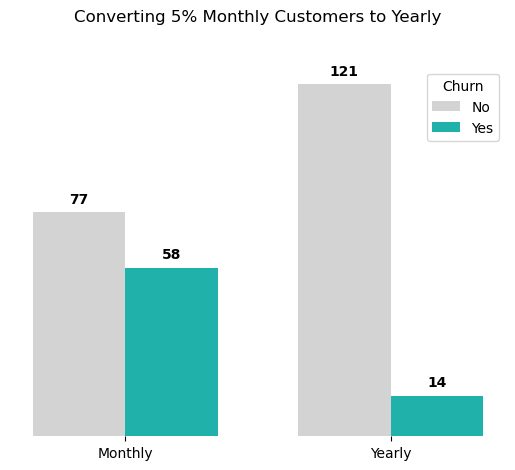

In [85]:
import numpy as np

# Data
bar_labels = ['Monthly', 'Yearly']
bar_values_group1 = [77, 121]
bar_values_group2 = [58, 14]

bar_width = 0.35  # Width of each bar

# Create the figure and axes
fig, ax = plt.subplots()

# Create grouped bar charts
bars_group1 = np.arange(len(bar_labels))
bars_group2 = [x + bar_width for x in bars_group1]

custom_colors = ["lightgreen", "red"]  # Replace with your desired colors

ax.bar(bars_group1, bar_values_group1, width=bar_width, label='No', color= 'lightgrey')
ax.bar(bars_group2, bar_values_group2, width=bar_width, label='Yes', color= 'lightseagreen')

# Adding values on top of the bars
for bars, values in [(bars_group1, bar_values_group1), (bars_group2, bar_values_group2)]:
    for i, v in enumerate(values):
        ax.text(bars[i], v + 2, str(v), ha='center', va='bottom', fontweight='bold')

ax.set_xlabel('')
ax.set_ylabel('Values')
ax.set_title('Converting 5% Monthly Customers to Yearly', y= 1.10)
ax.set_xticks(bars_group1 + bar_width / 2)
ax.set_xticklabels(bar_labels)
ax.legend(title= 'Churn')

# Remove y-axis
ax.yaxis.set_visible(False)

sns.despine(ax=ax, left=True, bottom=True)

plt.show()


The mean monthly charges of customers churn is significantly higher than the population monthly charge average

## Exploration Summary

* 'gender' has no significant association. I will not move on with this feature
* 'phone_service' has no significant association. I will not move on with this feature
* 'multiple_lines' has no significant association. I will not move on with this feature

* Majority of customers or on month to month contracts
* Monthly charges drive customer churn. The mean monthly charges for customers that churn is significantly higher than the monthly charge average for the population. I will move on with this feature

---

## Modeling

* Evaluation metric is accuracy
* Baseline = 74%

In [ ]:
#X,y split train, val and test and get dummies
X_train, y_train = p.xy_split(train)
X_val, y_val = p.xy_split(val)
X_test, y_test = p.xy_split(test)
    
X_train = p.dummies(X_train)
X_val = p.dummies(X_val)
X_test = p.dummies(X_test)

## Random Forest

In [ ]:
#create a random forest model
m.r_forest(X_train, y_train, X_val, y_val)

## Decision Tree

In [ ]:
#create decision tree model
m.d_tree(X_train, y_train, X_val, y_val)

## KNN

In [ ]:
#create knn model
m.knn_m(X_train, y_train, X_val, y_val)

## Comparing Models

* All model outperform the baseline of 74%
* KNN has highest accuracy score on train data but least on val data.
* Random forest and decision tree perform just about the same on train data 
* I choose decision tree since it out performs all model on val data

## Decision Tree Test

In [ ]:
#run test on decision tree model
m.d_tree_test(X_train, y_train, X_test, y_test)

## Modeling Summary

* All performed above the baseline on train data but decision tree had the highest score on val data

## Conclusions

Exploration
* gender, phone service, multiple lines were found as isignificant features
* month to month contract with high charges drive customer churn

Modeling
* The decision tree model performed above the baseline on train, val, and test data

## Recommendations
* To retain more customers telco needs to sign more yearly contracts or reduce monthly charges

## Next Steps
* Investigate feature importance and minimize dimension by dropping features
* Investigate if there are features I can combine